In [26]:
import numpy as np
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [27]:
df_iris = pd.read_csv('iris.txt', sep= ',', header= None)
df_iris.head()

,0,1,2,3,4
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,6.6,2.9,4.6,1.3,Iris-versicolor
3,4.6,3.2,1.4,0.2,Iris-setosa
4,6.0,2.2,4.0,1.0,Iris-versicolor


# Calculating similarities between samples

## defining function for calculating similarity

In [28]:
def calculate_similarity(A, B, std):
    '''The function definition fgoes here.'''
    from numpy.linalg import norm
    return np.exp(np.divide(norm(np.subtract(A, B))**2, -2 * std**2))


## Calculating IRIS standard deviation

In [29]:
std = 0.73

## Calculating similarities

In [30]:
similarity_values = np.zeros((len(df_iris), len(df_iris)))
similarity_values.fill(np.nan)
for i in range(len(df_iris)):
    for j in range(i + 1, len(df_iris)):
        similarity_values[i, j] = np.round(calculate_similarity(df_iris.loc[i][:4], df_iris.loc[j][:4], std), 3)

## Calculating mean & standard deviation of similarities

In [31]:
similarity_mean = np.round(np.nanmean(similarity_values), 3)
similarity_std = np.round(np.nanstd(similarity_values), 3)
print(f'Similarity mean: {similarity_mean}, std: {similarity_std}')

Similarity mean: 0.199, std: 0.289


# Calculating adjacent matrix based on similarities

## Defining the threshold

In [32]:
threshold = np.round(similarity_mean + (2 * similarity_std), 3)
threshold

0.777

## Producing adjacent matrix based on threshold value

In [33]:
adjacent = np.copy(similarity_values)
adjacent = np.where(adjacent >= threshold, 1, 0)
adjacent[np.isnan(adjacent)] = 0
print('Number of edges: ', adjacent.sum())

Number of edges:  803


# Graph analysis

In [34]:
adjacent_df = pd.DataFrame(adjacent.T + adjacent)
# adjacent_df = adjacent_df.loc[adjacent_df.sum() != 0, adjacent_df.sum() != 0 ]
adjacent_df.shape

(150, 150)

## Calculating degree of nodes

Mean of nodes degree:  10.707


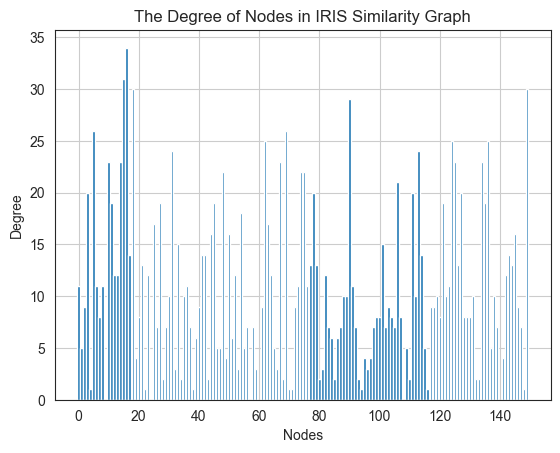

In [35]:
degree_of_nodes = adjacent_df.sum().to_dict()
mean_of_degree = np.sum(list(degree_of_nodes.values()))/ 150.0
print('Mean of nodes degree: ', np.round(mean_of_degree, 3))
plt.bar(degree_of_nodes.keys(), degree_of_nodes.values())
plt.title('The Degree of Nodes in IRIS Similarity Graph')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.grid()
plt.show()

## Representing degree sequence

In [36]:
degree_sequence = dict(sorted(degree_of_nodes.items(), key=lambda item: item[1], reverse= True))
print(list(degree_sequence.values()))

[34, 31, 30, 30, 29, 26, 26, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 17, 17, 16, 16, 16, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


## Representing degree distribution

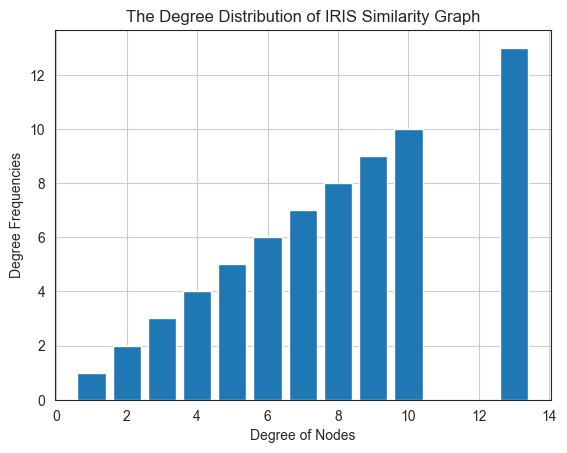

In [37]:
degree_distribution = Counter(degree_sequence.values())
plt.bar(degree_distribution.values(), degree_distribution.values())
plt.title('The Degree Distribution of IRIS Similarity Graph')
plt.xlabel('Degree of Nodes')
plt.ylabel('Degree Frequencies')
plt.grid()
plt.show()

## Representing degree probability mass function (PMF)

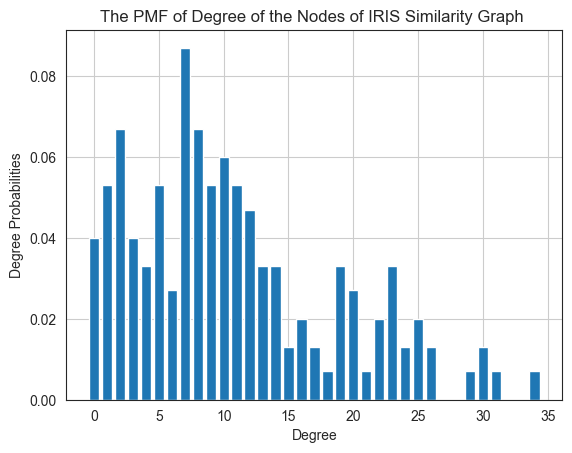

In [38]:
pmf = {d: np.round(nk / 150, 3) for d, nk in degree_distribution.items()}
plt.bar(pmf.keys(), pmf.values())
plt.title('The PMF of Degree of the Nodes of IRIS Similarity Graph ')
plt.xlabel('Degree')
plt.ylabel('Degree Probabilities')
plt.grid()
plt.show()

## Calculating path average of the graph

In [39]:
G = nx.from_pandas_adjacency(adjacent_df, create_using= nx.DiGraph)
print('Number of strongly connected components in the IRIS graph', nx.number_strongly_connected_components(G))

Number of strongly connected components in the IRIS graph 11


### Extracting Components

In [40]:
graphs = nx.condensation(G)
component_0 = graphs.nodes.data()[0]['members']
component_1 = graphs.nodes.data()[1]['members']
G0 = G.subgraph(component_0)
G1 = G.subgraph(component_1)
print('Diameter of component_0: ', nx.diameter(G0), end= '')
print(' Radius of component_0: ', nx.radius(G0))
print('Diameter of component_1: ', nx.diameter(G1), end= '')
print('  Radius of component_1: ', nx.radius(G1))

Diameter of component_0:  10 Radius of component_0:  5
Diameter of component_1:  6  Radius of component_1:  3


### Average shortest path for each component

In [41]:
print('Path average for component_0: ', np.round(nx.average_shortest_path_length(G0), 2))
print('Path average for component_1: ', np.round(nx.average_shortest_path_length(G1), 2))

Path average for component_0:  3.9
Path average for component_1:  1.96


# Exercises

## Exercise1 : Draw the calculated adjacency matrix(graph) with networkx library

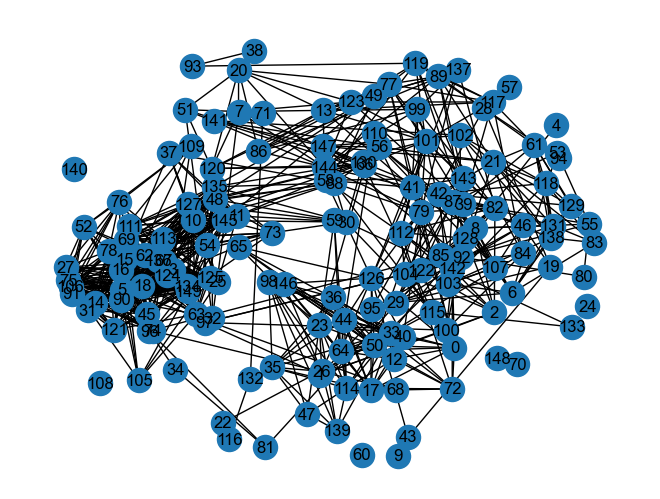

In [42]:
g = nx.from_pandas_adjacency(adjacent_df)
nx.draw(g ,pos=nx.spring_layout(g, k=0.7) ,with_labels=True)

## Exercise2: Draw each IRIS class with different node shapes from the calculated graph

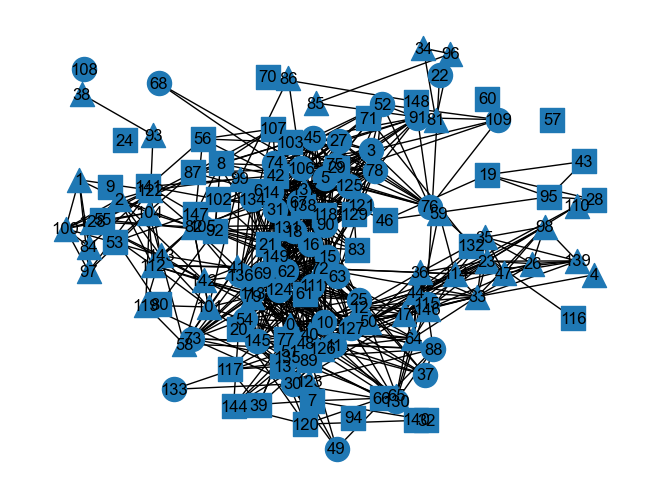

In [43]:
list_1 = list()
list_2 = list()
list_3 = list()
for i in range(0, 150):
    if df_iris.loc[i][4] == 'Iris-setosa':
        list_1.append(i)
    elif df_iris.loc[i][4] == 'Iris-virginica':
        list_2.append(i)
    elif df_iris.loc[i][4] == 'Iris-versicolor':
        list_3.append(i)
subgraph_1 = nx.subgraph(g ,list_1)
subgraph_2 = nx.subgraph(g ,list_2)
subgraph_3 = nx.subgraph(g ,list_3)
nx.draw(subgraph_1 ,node_shape='o' ,pos=nx.spring_layout(subgraph_1, k=0.7) ,with_labels=True)
nx.draw(subgraph_2 ,node_shape='s' ,pos=nx.spring_layout(subgraph_2, k=0.7) ,with_labels=True)
nx.draw(subgraph_3 ,node_shape='^' ,pos=nx.spring_layout(subgraph_3, k=0.7) ,with_labels=True)

## Exercise3: Draw degree distribution of the calculated graph